![Title](cisco.png)

# Lab - Correlation Analysis in Python


## Part 1: The Dataset

Se utilizará un conjunto de datos que contiene 40 estudiantes diestros de introducción a la psicología anglosajona. Los sujetos realizaron cuantro pruebas secundarias (vocabulario, similitudes, diseño de bloques y finalización de imagen). de la Escala Wechsler de Inteligencia para Adultos.
Los investigadores utilizaron imágenes por resonancia magnética (IRM) para determinar el tamaño del cerebro.
También se incluó información sobre el genéro y el tamaño del cuerpo (altura y peso). Se ocultaron los pesos de dos sujetos y la altura de un sujeto por razones de confidencialidad.

Se realizaron dos sencillas modificaciones en el dataset:

1. Se reemplazaron los signos de interrogación por la cadena 'NaN', porque pandas no utiliza los signos de interrogación correctamente.

2. Reemplazar todos los caracteres de tabulación por comas, convirtiéndo el dataset en un CSV.

El conjunto de datos se guarda `brainsize.txt`.

#### Step 1: Carga el Dataset desde un archivo.

In [ ]:
import pandas as pd
brainFile = './Data/brainsize.txt'
brainFrame = pd.read_csv(brainFile)

#### Step 2: Verifica el dataframe.

Usamos el método `head()` para asegurarnos que el dataframe se ha cargado correctamente.

In [2]:
brainFrame.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,Female,133,132,124,118.0,64.5,816932
1,Male,140,150,124,NaN,72.5,1001121
2,Male,139,123,150,143.0,73.3,1038437
3,Male,133,129,128,172.0,68.8,965353
4,Female,137,132,134,147.0,65.0,951545


## Part 2: Gráficos Scatterplot  y  variables correlacionables.

#### Step 1: El método `describe()` de pandas.
El módulo de pandas incluye el método `describe()` que además de realizar cálculos comunes como conteo, promedio, mínimo o máximo; es una excelente manera de probar la validez de los valores del dataframe.<p>

In [3]:
brainFrame.describe()

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
count,40.000000,40.000000,40.00000,38.000000,39.000000,4.000000e+01
mean,113.450000,112.350000,111.02500,151.052632,68.525641,9.087550e+05
std,24.082071,23.616107,22.47105,23.478509,3.994649,7.228205e+04
min,77.000000,71.000000,72.00000,106.000000,62.000000,7.906190e+05
25%,89.750000,90.000000,88.25000,135.250000,66.000000,8.559185e+05
50%,116.500000,113.000000,115.00000,146.500000,68.000000,9.053990e+05
75%,135.500000,129.750000,128.00000,172.000000,70.500000,9.500780e+05
max,144.000000,150.000000,150.00000,192.000000,77.000000,1.079549e+06


#### Step 2: Gráficos Scatterplot o diagramas de dispersión.

Importantes al trabajar con correlaciones, ya que permiten una verificación visual rápida de la naturaleza de la relación entre las variables.

##### a. Cargar los módulos requeridos.
Es necesario importar los módulos `numpy` y `matplotlib`. 

In [4]:
import numpy as np
import matplotlib.pyplot as plt

##### b. Separar los datos.
Para asegurarse que los resultados no se sesguen, se dividen los datos en entradas masculinas y femeninas.

In [5]:
menDf = brainFrame[(brainFrame.Gender == 'Male')]
womenDf = brainFrame[(brainFrame.Gender == 'Female')]

##### c. Plot los gráficos.   
Como el conjunto de datos incluye tres medidas diferentes de inteligencia (PIQ, FSIQ y VIQ), se utiliza el método `mean()` para calcular el valor promedio entre las tres y guardar el resultado en la variable menMeanSmarts.<p>
El método matplotlib `scatter()` nos permite crear un gráfico de dispersión entre la variable menMeanSmarts variable y el atributo MRI_Count (medida del tamaño físico del cerebro de los sujetos).<p>


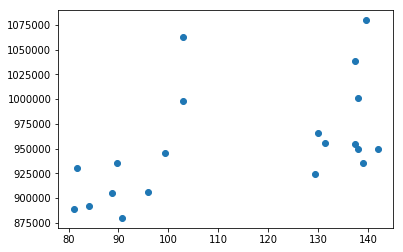

In [8]:
#Gráfico de dispersión para hombres.
menMeanSmarts = menDf[["PIQ", "FSIQ", "VIQ"]].mean(axis=1)
plt.scatter(menMeanSmarts, menDf["MRI_Count"])
plt.show() #Muestra el gráfico
#Garantiza que el gráfico se muestre en el notebook
%matplotlib inline 

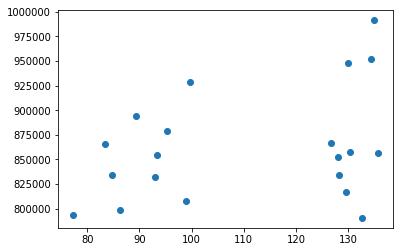

In [9]:
# Gráfico de dispersión para mujeres.
womenMeanSmarts = womenDf[["PIQ", "FSIQ", "VIQ"]].mean(axis=1)
plt.scatter(womenMeanSmarts, womenDf["MRI_Count"])
plt.show()
%matplotlib inline

## Part 3: Calcular la correlación con Python


#### Step 1: Calculo correlación según brainFrame.
El método pandas `corr()` ofrece una manera fácil de calcular la correlación.

In [10]:
brainFrame.corr(method='pearson')

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.946639,0.934125,-0.051483,-0.086002,0.357641
VIQ,0.946639,1.000000,0.778135,-0.076088,-0.071068,0.337478
PIQ,0.934125,0.778135,1.000000,0.002512,-0.076723,0.386817
Weight,-0.051483,-0.076088,0.002512,1.000000,0.699614,0.513378
Height,-0.086002,-0.071068,-0.076723,0.699614,1.000000,0.601712
MRI_Count,0.357641,0.337478,0.386817,0.513378,0.601712,1.000000


In [11]:
# Corelación de las variables sólo femenina
womenDf.corr(method='pearson')

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.955717,0.939382,0.038192,-0.059011,0.325697
VIQ,0.955717,1.000000,0.802652,-0.021889,-0.146453,0.254933
PIQ,0.939382,0.802652,1.000000,0.113901,-0.001242,0.396157
Weight,0.038192,-0.021889,0.113901,1.000000,0.552357,0.446271
Height,-0.059011,-0.146453,-0.001242,0.552357,1.000000,0.174541
MRI_Count,0.325697,0.254933,0.396157,0.446271,0.174541,1.000000


In [13]:
# Correlación de las variables sólo masculina
menDf.corr(method='pearson')

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.944400,0.930694,-0.278140,-0.356110,0.498369
VIQ,0.944400,1.000000,0.766021,-0.350453,-0.355588,0.413105
PIQ,0.930694,0.766021,1.000000,-0.156863,-0.287676,0.568237
Weight,-0.278140,-0.350453,-0.156863,1.000000,0.406542,-0.076875
Height,-0.356110,-0.355588,-0.287676,0.406542,1.000000,0.301543
MRI_Count,0.498369,0.413105,0.568237,-0.076875,0.301543,1.000000


## Part 4: Visualización

#### Step 1: Instalar Seaborn.
El módulo de Python `seaborn` facilita el trazado de los gráficos de los mapas de calor.

In [14]:
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://www.piwheels.org/simple


#### Step 2: Preparar la estructura de datos.

Seaborn tiene dificultades con algunos tipos de valores. Por ejemplo, cualquier número no entero o valor no flotante podría generar errores. Las entradas que no son números deben eliminarse del DataFrame.

In [15]:
# importar el módulo.
import seaborn as sns

#Crea copia de womenDf y menDf, y eliminamos columna género
womenNoGenderDf = womenDf.drop('Gender', axis=1)
menNoGenderDf = menDf.drop('Gender', axis=1)

#Convierte todos los valores del DataFrame en float
womenNoGenderDf = womenNoGenderDf[womenNoGenderDf.columns].astype(float)
menNoGenderDf = menNoGenderDf[menNoGenderDf.columns].astype(float)

#### Step 2: Plot the correlation heatmap.

Ahora que el DataFrame está preparado, podemos trazar los mapas de calor.
Seaborn tiene dificultades con algunos tipos de valores. Por ejemplo, cualquier número no entero o valor no flotante podría generar errores. Las entradas que no son números deben eliminarse del DataFrame.

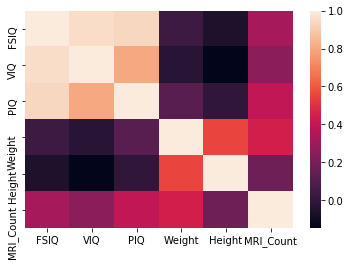

In [16]:
#Tabla de correlación basada en género femenino
wcorr = womenDf.corr()
#Generar y trazar mapa de calor.
sns.heatmap(wcorr)
#Esta línea nos permite guardar el mapa generado como PNG
#plt.savefig('attribute_correlations.png', tight_layout=True)

Similarly, the code below creates and plots a heatmap for the male-only dataframe.

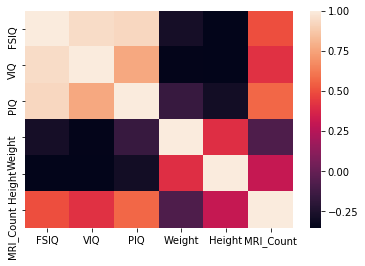

In [17]:
mcorr = menDf.corr()
sns.heatmap(mcorr)
#plt.savefig('attribute_correlations.png', tight_layout=True)

<font size='0.5'>&copy; 2017 Cisco and/or its affiliates. All rights reserved. This document is Cisco Public.<font>